In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import seaborn as sns
from PIL import Image, ImageDraw, ImageFont
path2img='./IDRID/Images/'
path2labels='./IDRID/Labels/'

In [2]:
train_labels = pd.read_csv(os.path.join(path2labels,'train/labels.csv'), index_col=0)
test_labels = pd.read_csv(os.path.join(path2labels,'test/labels.csv'), index_col=0)

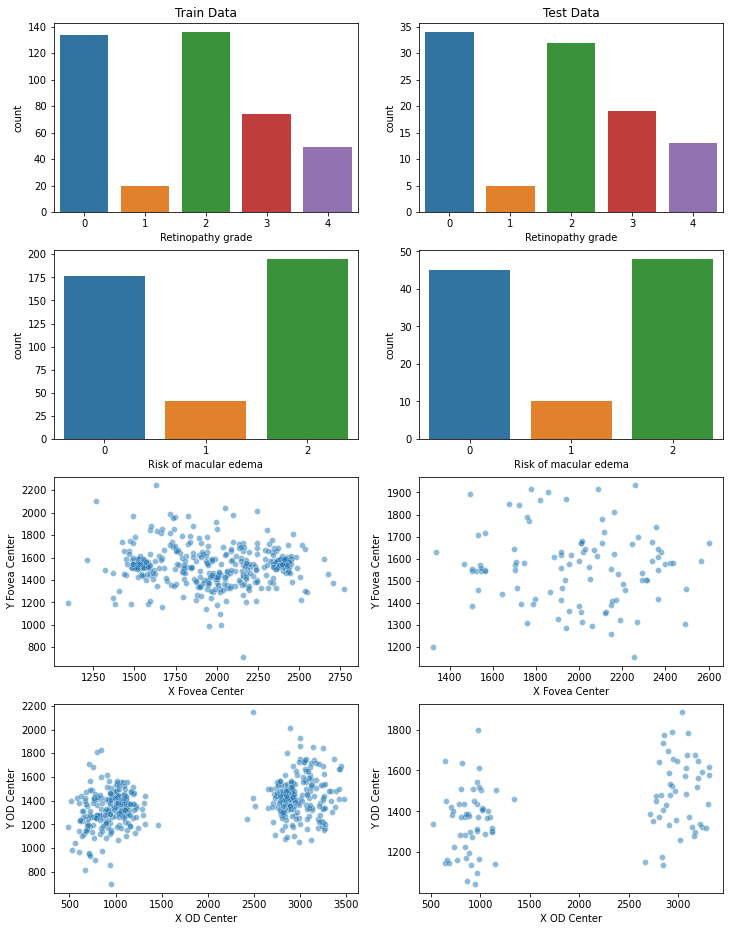

In [7]:
fig, ax = plt.subplots(ncols=2, nrows=4, figsize = (12,16))
data = [train_labels, test_labels]
text = ["Train", "Test"]

for i in range(2):
    sns.countplot(x=data[i]['Retinopathy grade'], ax=ax[0][i])
    ax[0][i].title.set_text(f"{text[i]} Data")
    sns.countplot(x=data[i]['Risk of macular edema'], ax=ax[1][i])
    sns.scatterplot(x=data[i]['X Fovea Center'], y=data[i]['Y Fovea Center'], alpha= 0.5, ax=ax[2][i])
    sns.scatterplot(x=data[i]['X OD Center'], y=data[i]['Y OD Center'], alpha= 0.5, ax=ax[3][i])
plt.show()

The fovea centralis, or fovea, is a small depression within the neurosensory retina where visual acuity is the highest. The fovea itself is the central portion of the macula, which is responsible for central vision.  -potentialy important for macular edema prediction, then maybe retinopathy and optical disk are joined too

In [4]:
np.unique(train_labels['X OD Center']<=2000, return_counts=True)

(array([False,  True]), array([204, 209], dtype=int64))

In [5]:
np.unique(test_labels['X OD Center']<=2000, return_counts=True)

(array([False,  True]), array([47, 56], dtype=int64))

In [6]:
(209+56)-(204+47)

14

In [38]:
import torchvision.models as models
import torch
from torchvision import datasets, transforms
resnet50 = models.resnet50(pretrained=True)

Tu w artykule mowią o encoderze resnet 50 zwracajacym 1024 wymiarowy output 
(layer4)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Linear(in_features=2048, out_features=1000, bias=True)
  , albo usuwamy do layer4 włącznie, ale w layer4 usuwamy tak by było git

In [61]:
resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [31]:
newmodel = torch.nn.Sequential(*(list(resnet50.children())[:-3]))

In [35]:
list(newmodel.children())[0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [60]:
x = np.random.uniform(size=(3,224,224))
imsize = 224
loader = transforms.Compose([transforms.Scale(imsize), transforms.ToTensor()])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.fromarray(((x.reshape((224,224,3)))*255).astype('uint8'), 'RGB')
    image = loader(image).float()
    image = torch.autograd.Variable(image, requires_grad=True)
    image = image.unsqueeze(0)  #this is for VGG, may not be needed for ResNet
    return image  #assumes that you're using GPU

image = image_loader(x)

newmodel.forward(image)

tensor([[[[0.5499, 0.1657, 0.0045,  ..., 0.2168, 0.3076, 0.1354],
          [0.0000, 0.0000, 0.0117,  ..., 0.0728, 0.0000, 0.0662],
          [0.0000, 0.0104, 0.1599,  ..., 0.1021, 0.1013, 0.1937],
          ...,
          [0.2326, 0.0000, 0.0489,  ..., 0.1300, 0.0544, 0.0744],
          [0.0785, 0.0095, 0.0000,  ..., 0.2618, 0.1371, 0.4811],
          [0.0770, 0.0000, 0.0086,  ..., 0.1477, 0.0000, 0.0634]],

         [[0.5106, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0225, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

         [[0.0000, 0.0000, 0.0000,  ..., 0.1526, 0.0000, 0.0000],
          [0.0000, 0.0264, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0176, 0.0000,  ..., 0